In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#python version
!python --version

Python 3.11.13


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn import tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [ ]:
!pip install openpyxl
!pip install imbalanced-learn

# Descriptive table for 2017 data sir provided

In [ ]:
#Data 2017
df_2017=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Age at First Marriage /Age at first marriage.xlsx")

In [ ]:
df_2017.columns

Index(['Respondent_current_age', 'Division', 'Types_of_place_of_residence',
       'Highest_educational_level', 'Religion', 'Literacy',
       'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
       'Respondent_currently_working', 'Weath_index_combined',
       'Age_at_first_birth', 'Current_contraceptive_method',
       'Ideal_number_of_children', 'Husband_age', 'Age_at_first_marriage',
       'Occupation_of_husband'],
      dtype='object')

In [ ]:
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15943 entries, 0 to 15942
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Respondent_current_age        15943 non-null  int64
 1   Division                      15943 non-null  int64
 2   Types_of_place_of_residence   15943 non-null  int64
 3   Highest_educational_level     15943 non-null  int64
 4   Religion                      15943 non-null  int64
 5   Literacy                      15943 non-null  int64
 6   Husband_desire_for_children   15943 non-null  int64
 7   Exposure                      15943 non-null  int64
 8   Husband_education_level       15943 non-null  int64
 9   Respondent_currently_working  15943 non-null  int64
 10  Weath_index_combined          15943 non-null  int64
 11  Age_at_first_birth            15943 non-null  int64
 12  Current_contraceptive_method  15943 non-null  int64
 13  Ideal_number_of_children      1

In [ ]:
def generate_summary_table(df, target, features):
    result = []

    for var in features:
        categories = df[var].unique()
        for cat in sorted(categories):
            total = len(df[df[var] == cat])
            pct_total = total / len(df) * 100

            # Subset by target = 0
            no_count = len(df[(df[var] == cat) & (df[target] == 0)])
            pct_no = no_count / total * 100 if total > 0 else 0

            # Subset by target = 1
            yes_count = len(df[(df[var] == cat) & (df[target] == 1)])
            pct_yes = yes_count / total * 100 if total > 0 else 0

            result.append([
                var,
                cat,
                f"{total} ({pct_total:.2f}%)",
                f"{no_count} ({pct_no:.2f}%)",
                f"{yes_count} ({pct_yes:.2f}%)"
            ])

    return pd.DataFrame(result, columns=["Variable", "Category", "Total n(%)", "No n(%)", "Yes n(%)"])


In [ ]:
target_var = 'Age_at_first_marriage'
features = ['Respondent_current_age', 'Division', 'Types_of_place_of_residence',
       'Highest_educational_level', 'Religion', 'Literacy',
       'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
       'Respondent_currently_working', 'Weath_index_combined',
       'Age_at_first_birth', 'Current_contraceptive_method',
       'Ideal_number_of_children', 'Husband_age',
       'Occupation_of_husband']  # change as per your variable names

summary_df = generate_summary_table(df_2017, target_var, features)


In [ ]:
summary_df

,Variable,Category,Total n(%),No n(%),Yes n(%)
0,Respondent_current_age,0,2132 (13.37%),1812 (84.99%),320 (15.01%)
1,Respondent_current_age,1,2908 (18.24%),2495 (85.80%),413 (14.20%)
2,Respondent_current_age,2,2818 (17.68%),2429 (86.20%),389 (13.80%)
3,Respondent_current_age,3,2631 (16.50%),2240 (85.14%),391 (14.86%)
4,Respondent_current_age,4,2075 (13.02%),1756 (84.63%),319 (15.37%)
...,...,...,...,...,...
56,Husband_age,1,3574 (22.42%),3185 (89.12%),389 (10.88%)
57,Husband_age,2,9767 (61.26%),8114 (83.08%),1653 (16.92%)
58,Husband_age,3,2602 (16.32%),2327 (89.43%),275 (10.57%)
59,Occupation_of_husband,0,1251 (7.85%),1076 (86.01%),175 (13.99%)


In [ ]:
summary_df.to_excel("summary_table.xlsx", index=False)

# Univariate analysis for 2022 dataset

In [ ]:
#Data 2022df_2022.columns
df_2022=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Age at First Marriage /Processed data of 2022 after delete null values and make groups in dataset.xlsx")

In [ ]:
df_2022.columns
df=df_2022

In [ ]:
df.columns

Index(['Types_of_place_of_residence', 'Division', 'Highest_educational_level',
       'Religion', 'Literacy', 'Weath_index_combined',
       'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
       'Respondent_currently_working', 'Respondent_current_age', 'Husband_age',
       'Respondent age at first birth', 'num of child',
       'Occupation_of_husband', 'Current_contrceptive_method',
       'Age_at_first_marriage'],
      dtype='object')

In [ ]:
'''df=df.rename(columns={'v012':'Respondent_current_age'})
df=df.rename(columns={'v101':'Division'})
df=df.rename(columns={'v025':'Types_of_place_of_residence'})
df=df.rename(columns={'v106':'Highest_educational_level'})
df=df.rename(columns={'v130':'Religion'})
df=df.rename(columns={'v155':'Literacy'})
df=df.rename(columns={'v621':'Husband_desire_for_children'})
df=df.rename(columns={'v623':'Exposure'})
df=df.rename(columns={'v701':'Husband_education_level'})
df=df.rename(columns={'v714':'Respondent_currently_working'})
df=df.rename(columns={'v190':'Weath_index_combined'})
df=df.rename(columns={'v212':'Age_at_first_birth'})
df=df.rename(columns={'v312':'Current_contraceptive_method'})
df=df.rename(columns={'v613':'Ideal_number_of_children'})
df=df.rename(columns={'v152':'Husband_age'})
df=df.rename(columns={'v705':'Occupation_of_husband'})
df=df.rename(columns={'v511':'Age_at_first_marriage'})

In [ ]:
df.columns

Index(['Types_of_place_of_residence', 'Division', 'Highest_educational_level',
       'Religion', 'Literacy', 'Weath_index_combined',
       'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
       'Respondent_currently_working', 'Respondent_current_age', 'Husband_age',
       'Respondent age at first birth', 'num of child',
       'Occupation_of_husband', 'Current_contrceptive_method',
       'Age_at_first_marriage'],
      dtype='object')

In [ ]:
def generate_summary_table(df, target, features):
    result = []

    for var in features:
        categories = df[var].unique()
        for cat in sorted(categories):
            total = len(df[df[var] == cat])
            pct_total = total / len(df) * 100

            # Subset by target = 0
            no_count = len(df[(df[var] == cat) & (df[target] == 0)])
            pct_no = no_count / total * 100 if total > 0 else 0

            # Subset by target = 1
            yes_count = len(df[(df[var] == cat) & (df[target] == 1)])
            pct_yes = yes_count / total * 100 if total > 0 else 0

            result.append([
                var,
                cat,
                f"{total} ({pct_total:.2f}%)",
                f"{no_count} ({pct_no:.2f}%)",
                f"{yes_count} ({pct_yes:.2f}%)"
            ])

    return pd.DataFrame(result, columns=["Variable", "Category", "Total n(%)", "No n(%)", "Yes n(%)"])


In [ ]:
df.columns

Index(['Types_of_place_of_residence', 'Division', 'Highest_educational_level',
       'Religion', 'Literacy', 'Weath_index_combined',
       'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
       'Respondent_currently_working', 'Respondent_current_age', 'Husband_age',
       'Respondent age at first birth', 'num of child',
       'Occupation_of_husband', 'Current_contrceptive_method',
       'Age_at_first_marriage'],
      dtype='object')

In [ ]:
target_var = 'Age_at_first_marriage'
features = ['Types_of_place_of_residence', 'Division', 'Highest_educational_level',
       'Religion', 'Literacy', 'Weath_index_combined',
       'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
       'Respondent_currently_working', 'Respondent_current_age', 'Husband_age',
       'Respondent age at first birth', 'num of child',
       'Occupation_of_husband', 'Current_contrceptive_method']  # change as per your variable names

summary_df = generate_summary_table(df, target_var, features)


In [ ]:
summary_df.head()

,Variable,Category,Total n(%),No n(%),Yes n(%)
0,Types_of_place_of_residence,1,5583 (34.81%),3989 (71.45%),1594 (28.55%)
1,Types_of_place_of_residence,2,10455 (65.19%),8562 (81.89%),1893 (18.11%)
2,Division,1,1766 (11.01%),1446 (81.88%),320 (18.12%)
3,Division,2,2442 (15.23%),1791 (73.34%),651 (26.66%)
4,Division,3,2412 (15.04%),1842 (76.37%),570 (23.63%)


In [ ]:
summary_df.to_excel("summary_table_for_2022.xlsx", index=False)

# Sample use

In [ ]:
sample_2017 = df_2017.sample(n=3000, random_state=42)
#sample_2022 = df_2022.sample(n=8000, random_state=42)
#sample = pd.concat([sample_2017, sample_2022])

In [ ]:
# Only 2022
df=sample_2017

# Preprocessing

In [ ]:
# Check the null vlaues
df.isnull().sum()

,0
Respondent_current_age,0
Division,0
Types_of_place_of_residence,0
Highest_educational_level,0
Religion,0
Literacy,0
Husband_desire_for_children,0
Exposure,0
Husband_education_level,0
Respondent_currently_working,0


In [ ]:
#Check the duplicates
df.duplicated().sum()
#Drop duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Rename the Variable
df.rename(columns={'v511':'Age_at_first_marriage'},inplace=True)
df.columns

Index(['Respondent_current_age', 'Division', 'Types_of_place_of_residence',
       'Highest_educational_level', 'Religion', 'Literacy',
       'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
       'Respondent_currently_working', 'Weath_index_combined',
       'Age_at_first_birth', 'Current_contraceptive_method',
       'Ideal_number_of_children', 'Husband_age', 'Age_at_first_marriage',
       'Occupation_of_husband'],
      dtype='object')

# Oversampling

# For Kflod Use Smote in Whole dataset

In [ ]:
X=df.drop('Age_at_first_marriage',axis=1)
Y=df['Age_at_first_marriage']

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
#DATA balanced in Smote technique  in whole dataset for k flod
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
x_oversampled, y_oversampled = sm.fit_resample(X, Y)

print('Before OverSampling, the shape of train_X: {}'.format(X.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(Y.shape))

print('After OverSampling, the shape of train_X: {}'.format(x_oversampled.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_oversampled.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_oversampled == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_oversampled == 0)))

Before OverSampling, the shape of train_X: (2937, 16)
Before OverSampling, the shape of train_y: (2937,) 

After OverSampling, the shape of train_X: (4946, 16)
After OverSampling, the shape of train_y: (4946,) 

After OverSampling, counts of label '1': 2473
After OverSampling, counts of label '0': 2473


In [ ]:
#Change the name
X=x_oversampled
Y=y_oversampled

In [ ]:
df=x_oversampled
df['Age_at_first_marriage']=y_oversampled

In [ ]:
df.columns

Index(['Respondent_current_age', 'Division', 'Types_of_place_of_residence',
       'Highest_educational_level', 'Religion', 'Literacy',
       'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
       'Respondent_currently_working', 'Weath_index_combined',
       'Age_at_first_birth', 'Current_contraceptive_method',
       'Ideal_number_of_children', 'Husband_age', 'Occupation_of_husband',
       'Age_at_first_marriage'],
      dtype='object')

In [ ]:
# Rename the columns
c1=['Respondent_current_age', 'Division', 'Types_of_place_of_residence',
       'Highest_educational_level', 'Religion', 'Literacy',
       'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
       'Respondent_currently_working', 'Weath_index_combined',
       'Age_at_first_birth', 'Current_contraceptive_method',
       'Ideal_number_of_children', 'Husband_age', 'Age_at_first_marriage',
       'Occupation_of_husband']

In [ ]:
df=df.rename(columns={'v012':'Respondent_current_age'})
df=df.rename(columns={'v101':'Division'})
df=df.rename(columns={'v025':'Types_of_place_of_residence'})
df=df.rename(columns={'v106':'Highest_educational_level'})
df=df.rename(columns={'v130':'Religion'})
df=df.rename(columns={'v155':'Literacy'})
df=df.rename(columns={'v621':'Husband_desire_for_children'})
df=df.rename(columns={'v623':'Exposure'})
df=df.rename(columns={'v701':'Husband_education_level'})
df=df.rename(columns={'v714':'Respondent_currently_working'})
df=df.rename(columns={'v190':'Weath_index_combined'})
df=df.rename(columns={'v212':'Age_at_first_birth'})
df=df.rename(columns={'v312':'Current_contraceptive_method'})
df=df.rename(columns={'v613':'Ideal_number_of_children'})
df=df.rename(columns={'v152':'Husband_age'})
df=df.rename(columns={'v705':'Occupation_of_husband'})

In [ ]:
df.columns

Index(['Respondent_current_age', 'Division', 'Types_of_place_of_residence',
       'Highest_educational_level', 'Religion', 'Literacy',
       'Husband_desire_for_children', 'Exposure', 'Husband_education_level',
       'Respondent_currently_working', 'Weath_index_combined',
       'Age_at_first_birth', 'Current_contraceptive_method',
       'Ideal_number_of_children', 'Husband_age', 'Occupation_of_husband',
       'Age_at_first_marriage'],
      dtype='object')

In [ ]:
#Remove a column contraceptive Method
df.drop(columns=['Current_contraceptive_method'],inplace=True)

# Accuracy Parameters

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4946 entries, 0 to 4945
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Respondent_current_age        4946 non-null   int64
 1   Division                      4946 non-null   int64
 2   Types_of_place_of_residence   4946 non-null   int64
 3   Highest_educational_level     4946 non-null   int64
 4   Religion                      4946 non-null   int64
 5   Literacy                      4946 non-null   int64
 6   Husband_desire_for_children   4946 non-null   int64
 7   Exposure                      4946 non-null   int64
 8   Husband_education_level       4946 non-null   int64
 9   Respondent_currently_working  4946 non-null   int64
 10  Weath_index_combined          4946 non-null   int64
 11  Age_at_first_birth            4946 non-null   int64
 12  Ideal_number_of_children      4946 non-null   int64
 13  Husband_age                   494

In [ ]:
# Define the Features for different Categories
#target = "Age_at_first_marriage"
df_Lasso = df.drop(columns=["Division","Husband_desire_for_children","Weath_index_combined","Exposure","Ideal_number_of_children","Husband_age"])
df_Chi = df.drop(columns=["Occupation_of_husband","Respondent_current_age","Literacy"])
df_Boruta = df.drop(columns=["Husband_desire_for_children", "Ideal_number_of_children","Occupation_of_husband"])

print(df_Chi.shape)
print(df_Lasso.shape)
print(df_Boruta.shape)

(4946, 13)
(4946, 10)
(4946, 13)


In [ ]:
X_Lasso =df_Lasso.drop("Age_at_first_marriage",axis=1)
Y_Lasso =df_Lasso["Age_at_first_marriage"]
X_chi =df_Chi.drop("Age_at_first_marriage",axis=1)
Y_chi =df_Chi["Age_at_first_marriage"]
X_Boruta =df_Boruta.drop("Age_at_first_marriage",axis=1)
Y_Boruta =df_Boruta["Age_at_first_marriage"]

In [ ]:
#!pip install xgboost

In [ ]:
# Defining the Models
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
models = [tree.DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=4, class_weight=None, min_samples_split = 2, min_samples_leaf=0.05, random_state=0),
          SVC(kernel ="rbf", probability=True, C=10, gamma= 0.1),
          BernoulliNB(alpha=10.0),
          KNeighborsClassifier(n_neighbors=3),
          RandomForestClassifier(criterion='gini',min_samples_leaf=200),
          GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100),
          XGBClassifier(learning_rate =0.02, max_depth =5, min_samples_leaf = 0.05),
          AdaBoostClassifier(learning_rate=0.0001, n_estimators=10)]

# DT : alpha: 0.01, criterion: 'gini', max depth: 7,  max features: 'log2'

In [ ]:
# Defining the Models
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
models = [tree.DecisionTreeClassifier(),
          SVC(),
          BernoulliNB(),
          KNeighborsClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          XGBClassifier(),
          AdaBoostClassifier()]

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Initialize lists to store scores
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []


# Set up cross-validation
cv = StratifiedKFold(n_splits=10)
def compare_models(X, Y, model):
    # Perform cross-validation loop
    for train_idx, test_idx in cv.split(X, Y):
        X_train, X_test = X.values[train_idx], X.values[test_idx]
        y_train, y_test = Y.values[train_idx], Y.values[test_idx]

        # Train the model
        model.fit(X_train, y_train)

        # Evaluate the model on the test set
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred, average='weighted')
        precision = precision_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Append scores
        accuracy_scores.append(accuracy)
        f1_scores.append(f1)
        recall_scores.append(recall)
        precision_scores.append(precision)



```
# This is formatted as code
```

# Lasso Features

In [ ]:
accuracy_scores_main = []
precision_scores_main = []
recall_scores_main = []
f1_scores_main = []

for model in models:
    # Run the model comparison
    compare_models(X_Lasso, Y_Lasso, model)

    # Append the mean scores without reassigning
    accuracy_scores_main.append(np.mean(accuracy_scores) * 100)
    precision_scores_main.append(np.mean(precision_scores) * 100)
    recall_scores_main.append(np.mean(recall_scores) * 100)
    f1_scores_main.append(np.mean(f1_scores) * 100)

In [ ]:
model_performance1 = pd.DataFrame(
    {'Model': ['CART','SVM','Naive Bayes','KNN','RM','GBM','ADABoost','XGBoost'],
    'Accuracy': accuracy_scores_main,
    'Precision': precision_scores_main,
    'Recall': recall_scores_main,
    'F1 Score': f1_scores_main
     }
)
model_performance1

,Model,Accuracy,Precision,Recall,F1 Score
0,CART,84.108535,84.258204,84.108535,84.089200
1,SVM,82.824071,83.421925,82.824071,82.736892
2,Naive Bayes,76.661391,77.144084,76.661391,76.554869
3,KNN,77.866162,78.578628,77.866162,77.734260
4,RM,79.175308,79.758117,79.175308,79.068283
5,GBM,79.768277,80.342991,79.768277,79.667455
6,ADABoost,80.440332,80.946832,80.440332,80.352213
7,XGBoost,80.645989,81.148585,80.645989,80.560445


# Chi-square Features

In [ ]:
accuracy_scores_main = []
precision_scores_main = []
recall_scores_main = []
f1_scores_main = []

for model in models:
    # Run the model comparison
    compare_models(X_chi,Y_chi,model)

    # Append the mean scores without reassigning
    accuracy_scores_main.append(np.mean(accuracy_scores) * 100)
    precision_scores_main.append(np.mean(precision_scores) * 100)
    recall_scores_main.append(np.mean(recall_scores) * 100)
    f1_scores_main.append(np.mean(f1_scores) * 100)

In [ ]:
model_performance2 = pd.DataFrame(
    {'Model': ['CART','SVM' ,'Naive Bayes','KNN','RM','GBM','ADABoost','XGBoost'],
    'Accuracy': accuracy_scores_main,
    'Precision': precision_scores_main,
    'Recall': recall_scores_main,
    'F1 Score': f1_scores_main
     }
)
model_performance2

,Model,Accuracy,Precision,Recall,F1 Score
0,CART,81.248717,81.728256,81.248717,81.169734
1,SVM,81.374866,81.874191,81.374866,81.294477
2,Naive Bayes,79.803798,80.266727,79.803798,79.725364
3,KNN,80.234971,80.662454,80.234971,80.162770
4,RM,80.924854,81.330145,80.924854,80.857469
5,GBM,81.134909,81.527941,81.134909,81.070242
6,ADABoost,81.589247,81.961491,81.589247,81.528414
7,XGBoost,81.611456,81.985861,81.611456,81.550846


# Boruta Features

In [ ]:
accuracy_scores_main = []
precision_scores_main = []
recall_scores_main = []
f1_scores_main = []

for model in models:
    # Run the model comparison
    compare_models(X_Boruta,Y_Boruta,model)

    # Append the mean scores without reassigning
    accuracy_scores_main.append(np.mean(accuracy_scores) * 100)
    precision_scores_main.append(np.mean(precision_scores) * 100)
    recall_scores_main.append(np.mean(recall_scores) * 100)
    f1_scores_main.append(np.mean(f1_scores) * 100)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:49:11] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "min_samples_leaf" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [16:49:11] WARNING: /works

In [ ]:
model_performance3 = pd.DataFrame(
    {'Model': ['CART','SVM' ,'Naive Bayes','KNN','RM','GBM','ADABoost','XGBoost'],
    'Accuracy': accuracy_scores_main,
    'Precision': precision_scores_main,
    'Recall': recall_scores_main,
    'F1 Score': f1_scores_main
     }
)
model_performance3

,Model,Accuracy,Precision,Recall,F1 Score
0,CART,82.011784,82.578760,82.011784,81.921615
1,SVM,82.157153,82.694540,82.157153,82.071790
2,Naive Bayes,82.131621,82.682098,82.131621,82.044609
3,KNN,82.241115,82.768196,82.241115,82.157928
4,RM,82.237095,82.753002,82.237095,82.155797
5,GBM,82.262447,82.766006,82.262447,82.183371
6,ADABoost,82.275760,82.775835,82.275760,82.197579
7,XGBoost,82.268107,82.773319,82.268107,82.189371


# Roc Curve

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14692 entries, 0 to 15941
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Respondent_current_age        14692 non-null  int64
 1   Division                      14692 non-null  int64
 2   Types_of_place_of_residence   14692 non-null  int64
 3   Highest_educational_level     14692 non-null  int64
 4   Religion                      14692 non-null  int64
 5   Literacy                      14692 non-null  int64
 6   Husband_desire_for_children   14692 non-null  int64
 7   Exposure                      14692 non-null  int64
 8   Husband_education_level       14692 non-null  int64
 9   Respondent_currently_working  14692 non-null  int64
 10  Weath_index_combined          14692 non-null  int64
 11  Age_at_first_birth            14692 non-null  int64
 12  Current_contraceptive_method  14692 non-null  int64
 13  Ideal_number_of_children      14692 

In [ ]:
# Define the Features for different Categories
#target = "Age_at_first_marriage"
df_Lasso = df.drop(columns=["Division","Husband_desire_for_children","Weath_index_combined","Exposure","Current_contraceptive_method","Ideal_number_of_children","Husband_age"])
df_Chi = df.drop(columns=["Occupation_of_husband","Respondent_current_age","Literacy"])
df_Boruta = df.drop(columns=["Husband_desire_for_children", "Ideal_number_of_children","Occupation_of_husband"])

print(df_Lasso.shape)
print(df_Chi.shape)
print(df_Boruta.shape)

(14692, 10)
(14692, 14)
(14692, 14)


In [ ]:
X_Lasso =df_Lasso.drop("Age_at_first_marriage",axis=1)
Y_Lasso =df_Lasso["Age_at_first_marriage"]
X_chi =df_Chi.drop("Age_at_first_marriage",axis=1)
Y_chi =df_Chi["Age_at_first_marriage"]
X_Boruta =df_Boruta.drop("Age_at_first_marriage",axis=1)
Y_Boruta =df_Boruta["Age_at_first_marriage"]

In [ ]:
# Defining the Models
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

models = [tree.DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=4, class_weight=None, min_samples_split = 2, min_samples_leaf=0.05, random_state=0),
          SVC(kernel ="rbf", probability=True, C=10, gamma= 0.1),
          BernoulliNB(alpha=10.0),
          KNeighborsClassifier(n_neighbors=3),
          RandomForestClassifier(criterion='gini',min_samples_leaf=200),
          GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100),
          XGBClassifier(learning_rate =0.02, max_depth =5, min_samples_leaf = 0.05),
          AdaBoostClassifier(learning_rate=0.0001, n_estimators=10)]

Non_ensemble_models = [tree.DecisionTreeClassifier(criterion='gini',splitter='best', max_depth=4, class_weight=None, min_samples_split = 2, min_samples_leaf=0.05, random_state=0),
          SVC(kernel ="rbf", probability=True, C=10, gamma= 0.1),
          BernoulliNB(alpha=10.0),
          KNeighborsClassifier(n_neighbors=3)]

Ensemble_models=[RandomForestClassifier(criterion='gini',min_samples_leaf=200),
          GradientBoostingClassifier(learning_rate= 0.1, max_depth=3, n_estimators= 100),
          XGBClassifier(learning_rate =0.02, max_depth =5, min_samples_leaf = 0.05),
          AdaBoostClassifier(learning_rate=0.0001, n_estimators=10)]

In [ ]:
#Defining Material for ROC curve :
linestyles = ['--', '--', '--', '--']  # Different linestyles for each model
colors = ['b', 'g', 'r', 'y']  # Different colors for each model
Non_Ensemble_models_name=[' k-nearest neighbors','Classification and Regression Trees','Support Vector Machine','Naive Bayes']
Ensemble_models_name= ['Random Forest','Gradient Boosting','XG Boost','ADA Boost']

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
model_scores1 =[]
fpr1= []
tpr1= []
thresholds1=[]
auc1= []
def AUC_exp(x_train, x_test, y_train, y_test,models):
    for model in models:
        model_scores=(model.predict_proba(x_test)[:,1])
        fpr, tpr, thresholds = roc_curve(y_test, model_scores)
        fpr1.append(fpr)
        tpr1.append(tpr)
        thresholds1.append(thresholds)
        model_scores1.append(model_scores)
        auc = roc_auc_score(y_test, model_scores)
        auc1.append(auc)

# Lasso Curve

In [ ]:
X1_train_Lasso, X1_test_Lasso, y_train_Lasso, y_test_Lasso= train_test_split(X_Lasso, Y_Lasso, test_size=0.3, random_state=42)
for i in Lasso_Ensemble_models:
    i.fit(X1_train_Lasso, y_train_Lasso)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


**Ensemble Models**

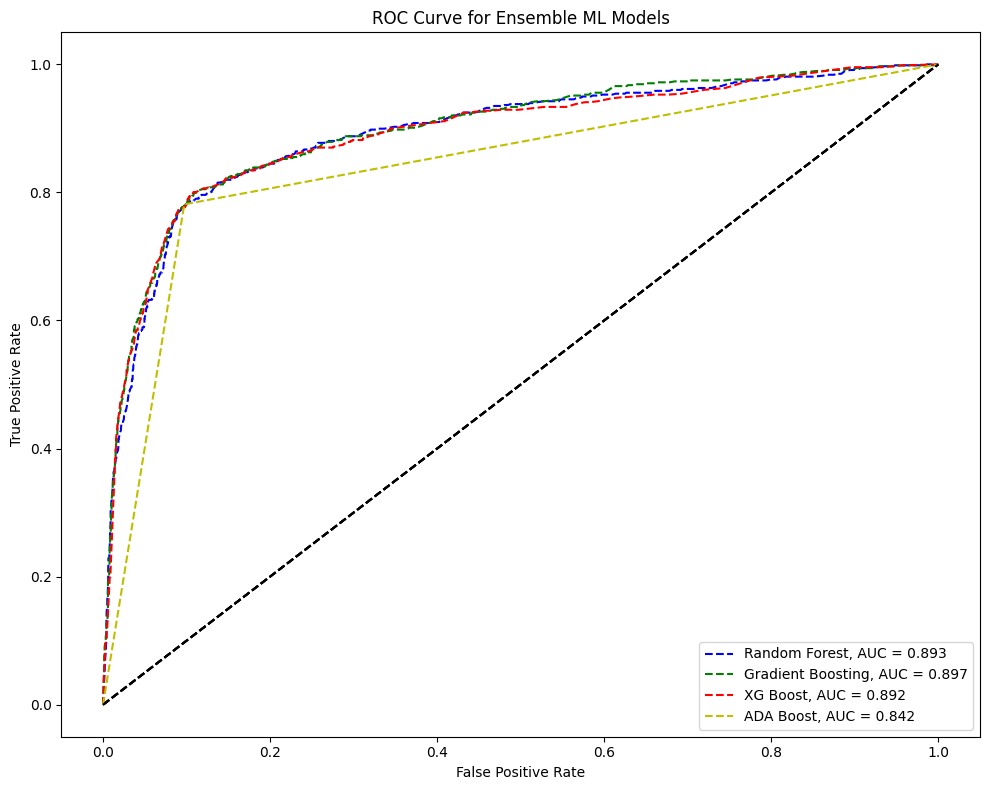

In [ ]:
#Call the Function
AUC_exp(X1_train_Lasso, X1_test_Lasso, y_train_Lasso, y_test_Lasso,Lasso_Ensemble_models)

# Plot the Graph
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Non Ensemble Models**

In [ ]:
X1_train_Lasso, X1_test_Lasso, y_train_Lasso, y_test_Lasso= train_test_split(X_Lasso, Y_Lasso, test_size=0.3, random_state=42)
for i in Lasso_Non_ensemble_models:
    i.fit(X1_train_Lasso, y_train_Lasso)

In [ ]:
#Call the Function
AUC_exp(X1_train_Lasso, X1_test_Lasso, y_train_Lasso, y_test_Lasso,Lasso_Non_ensemble_models)

# Plot the Graph
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Non_Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Non Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

AttributeError: This 'SVC' has no attribute 'predict_proba'

**Non ensemble Models**

# Chi-square Curve

In [ ]:
Chi_Ensemble_models=[RandomForestClassifier(),
          GradientBoostingClassifier(),
          XGBClassifier(),
          AdaBoostClassifier()]

**Ensemble Models**

In [ ]:
X1_train_chi, X1_test_chi, y_train_chi, y_test_chi= train_test_split(X_chi, Y_chi, test_size=0.3, random_state=42)
for i in Chi_Ensemble_models:
    i.fit(X1_train_chi,y_train_chi)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


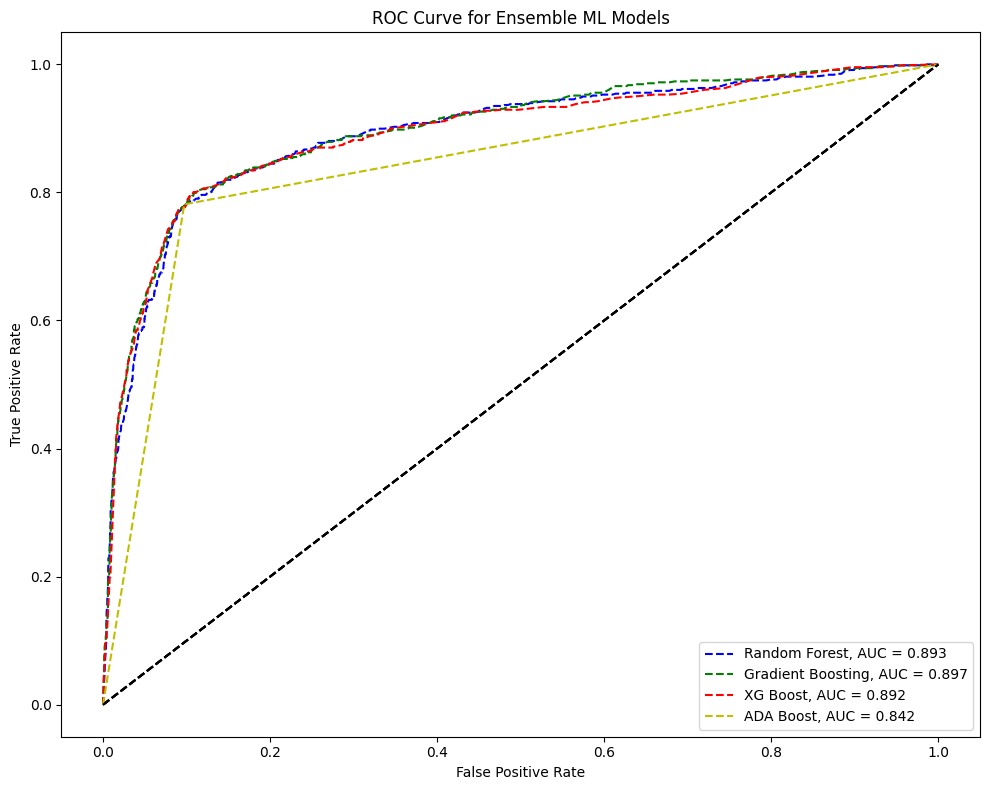

In [ ]:
#Call the Function
AUC_exp(X1_train_chi, X1_test_chi, y_train_chi, y_test_chi,Chi_Ensemble_models)

# Plot the Graph
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Non Ensemble Models**

In [ ]:
X1_train_chi, X1_test_chi, y_train_chi, y_test_chi= train_test_split(X_chi, Y_chi, test_size=0.3, random_state=42)
for i in Non_ensemble_models:
    i.fit(X1_train_chi,y_train_chi)

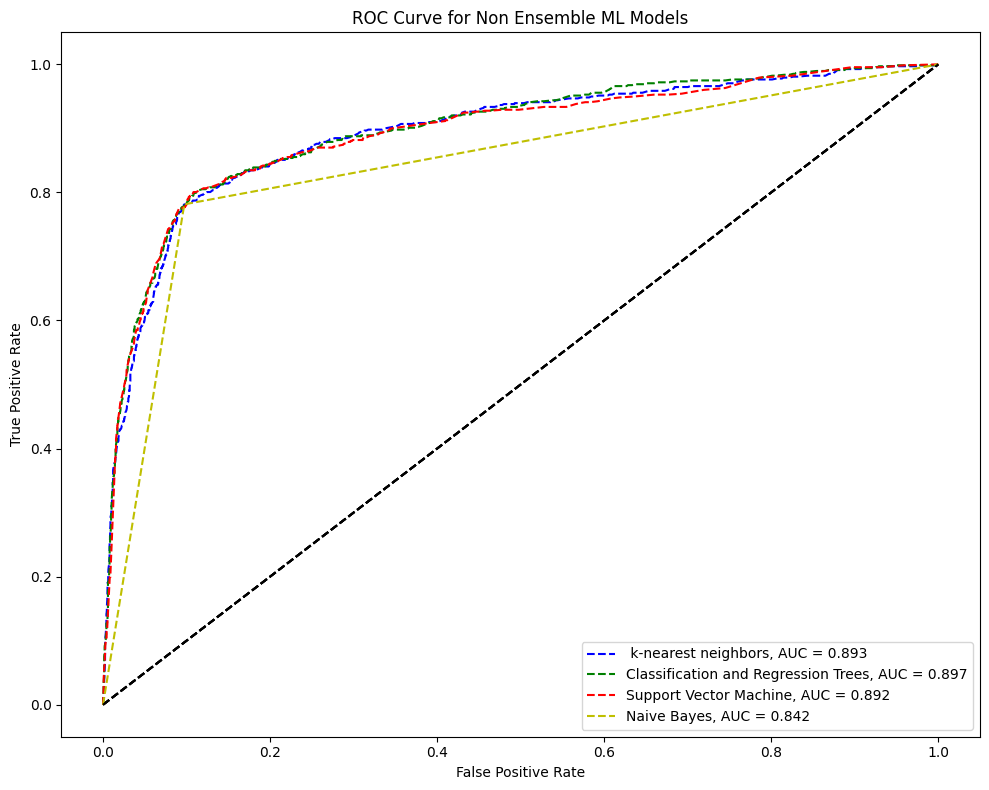

In [ ]:
#Call the Function
AUC_exp(X1_train_chi, X1_test_chi, y_train_chi, y_test_chi,Non_ensemble_models)

# Plot the Graph
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Non_Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Non Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Non ensemble Models**

# Boruta Curve

**Ensemble Models**

In [ ]:
X1_Boruta_train, X1_Boruta_test, y_Boruta_train, y_Boruta_test= train_test_split(X_Boruta, Y_Boruta, test_size=0.3, random_state=42)
for i in Ensemble_models:
    i.fit(X1_Boruta_train, y_Boruta_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [01:55:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


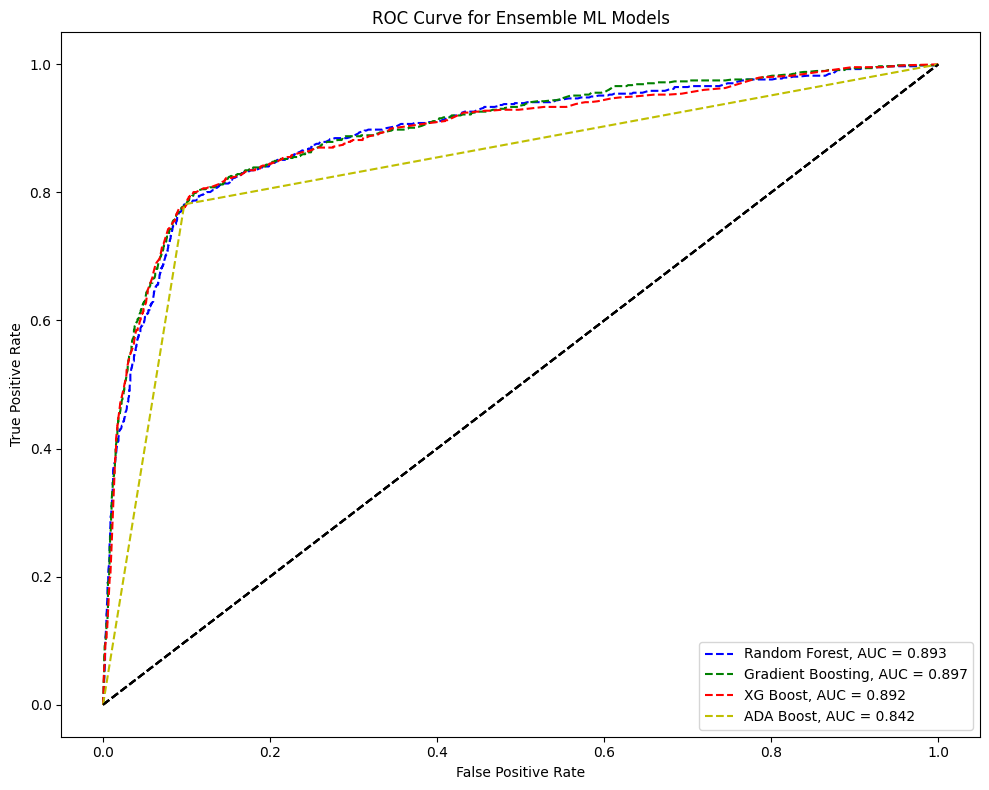

In [ ]:
#Call the Function
AUC_exp(X1_Boruta_train, X1_Boruta_test, y_Boruta_train, y_Boruta_test,Ensemble_models)

# Plot the Graph
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Non Ensemble Models**

In [ ]:
X1_Boruta_train, X1_Boruta_test, y_Boruta_train, y_Boruta_test= train_test_split(X_Boruta, Y_Boruta, test_size=0.3, random_state=42)
for i in Non_ensemble_models:
    i.fit(X1_Boruta_train, y_Boruta_train)

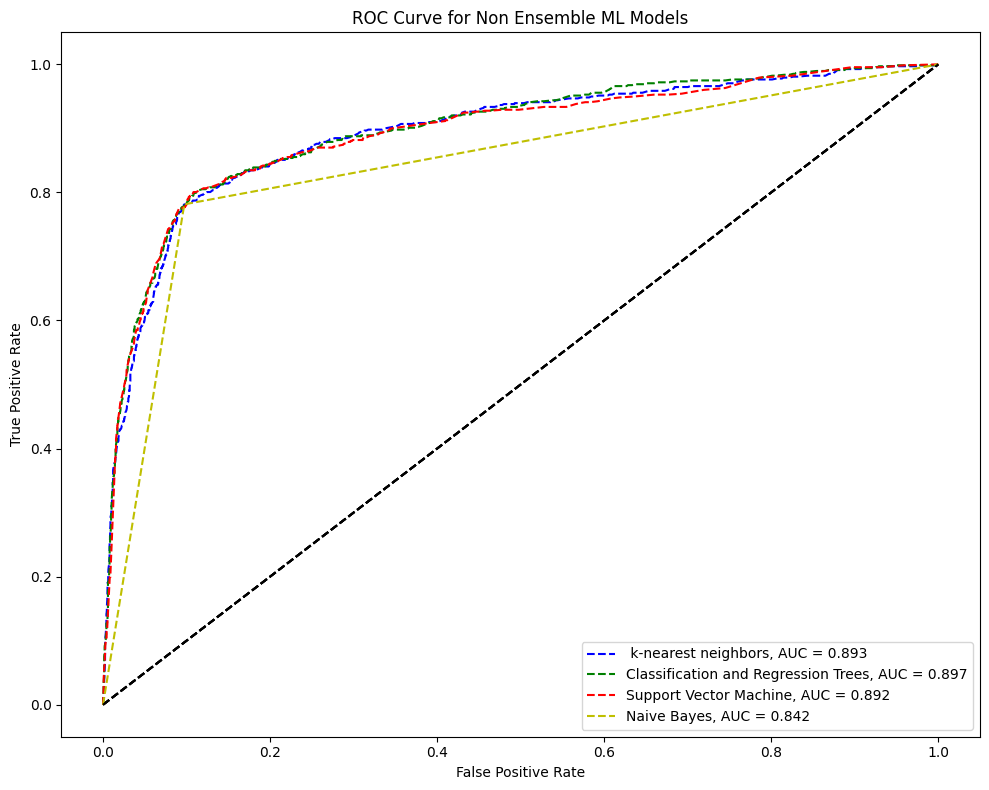

In [ ]:
#Call the Function
AUC_exp(X1_Boruta_train, X1_Boruta_test, y_Boruta_train, y_Boruta_test,Non_ensemble_models)

# Plot the Graph
plt.figure(figsize=(10, 8))
for i in range(4):
  plt.plot(fpr1[i], tpr1[i], color=colors[i], linestyle='--', label=f'{Non_Ensemble_models_name[i]}, AUC = {auc1[i]:.3f}')
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
# Plot with dashed linestyle and color
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Non Ensemble ML Models')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

**Non ensemble Models**

In [ ]:
%pip install openpyxl

In [ ]:
%pip install imblearn xgboost